In [8]:
from PIL import Image
import torch
from pypylon import pylon
import numpy as np
import cv2
from ctypes import *
import glob
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import time
import imquality.brisque as brisque
%matplotlib inline

In [2]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\CIG/.cache\torch\hub\master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   

Adding autoShape... 


In [3]:
def find_class(results, obj = 'car'):
    len_of_class = len(results.pred)
    pred_class = [int(results.pred[0][i].numpy()[5]) for i in range(len(results.pred[0]))]
    #list_of_yolo_classes = list(zip(results.names, range(0, len(results.names))))
    pred_names = [results.names[i] for i in pred_class]
    if obj in pred_names:
        index = pred_names.index(obj)
        return results.pred[0][index].numpy()
    else:
        return np.array([])
    
# def yolo_information(model_yolo, stack_of_imgs):
#     imgs_stack_yolo = []
#     for im in stack_of_imgs:
#         results = model_yolo(im, size=640)  
#         results.print()  # print results to screen
#         #results.show()  # display results
#         r = find_class(results, obj = 'car')
#         if r.size == 0:
#             imgs_stack_yolo.append(0)
#         else:
#             imgs_stack_yolo.append(im.crop((r[0], r[1], r[2], r[3])))
            
#     return imgs_stack_yolo

In [4]:
img_path = r'D:\cringe'

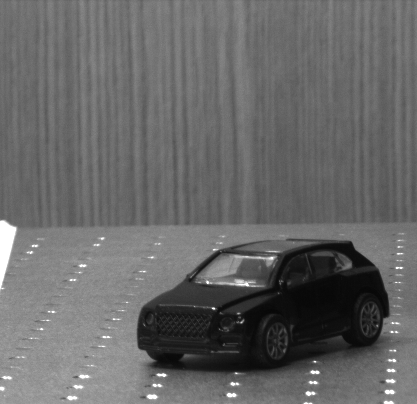

In [7]:
Image.open(r'D:\cringe\20\img_48.17.png')

C:\Users\CIG\Anaconda3\envs\corning\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


25.371034454660702


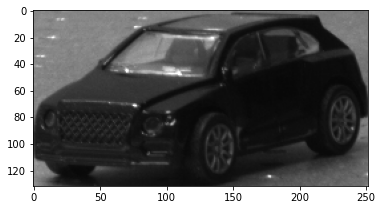

In [25]:
#48.17
image_infocus = np.load(r'D:\cringe\20\img_48.17.npy')
prediction_yolo = model_yolo(image_infocus)
car_infocus_xy = find_class(prediction_yolo)
car_infocus = Image.fromarray(image_infocus).crop((car_infocus_xy[0], 
                                                   car_infocus_xy[1], 
                                                   car_infocus_xy[2],
                                                   car_infocus_xy[3]))
plt.imshow(car_infocus)
print(brisque.score(car_infocus))

C:\Users\CIG\Anaconda3\envs\corning\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)


42.29951973898753


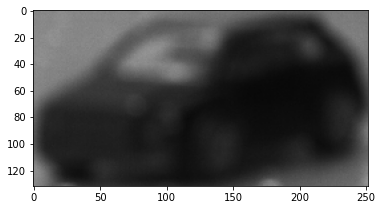

In [26]:
#46.54
image_outfocus = np.load(r'D:\cringe\20\img_46.54.npy')
prediction_yolo = model_yolo(image_outfocus)
car_outfocus_xy = find_class(prediction_yolo)
car_outfocus = Image.fromarray(image_outfocus).crop((car_infocus_xy[0], 
                                                   car_infocus_xy[1], 
                                                   car_infocus_xy[2],
                                                   car_infocus_xy[3]))
plt.imshow(car_outfocus)
print(brisque.score(car_outfocus))